### decode pattern

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import glob

In [4]:
import os

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

```c
row_light[w][0] = (Lg>0?static_cast<unsigned>(Ld):Lmax);

```

In [7]:
BIT_UNCERTAIN = 65535
gray_offset = (0, 128)

In [8]:
pattern_file_list = glob.glob('../data/cartman/2013-May-14_20.41.56.117/*.png')
pattern_file_list.sort()

In [9]:
def INVALID(value):
    return np.isnan(value)

In [10]:
def util_grayToBinary(num, numBits):
    shift = 1
    while shift<numBits:
        num ^= num >> shift
        shift = shift << 1
    return num

In [11]:
def grayToBinary(value, set):
	return util_grayToBinary(value, 32) - gray_offset[set]

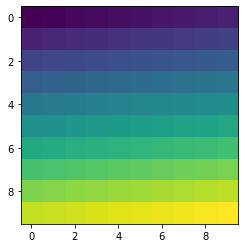

In [12]:
test = np.arange(200)
test.shape = 10, 10, 2
plt.imshow(test[:,:,1])
plt.show()

In [21]:
def conver_pattern(pattern_image, binary):
    if pattern_image.shape[0] == 0:
        return
    if pattern_image.shape[2] < 2:
        return
    if binary:
        print("Converting binary code to gray")
    else:
        print("Converting gray code to binary")

In [9]:
def get_robust_bit(value1, value2, Ld, Lg, m):
    if Ld < m:
        return BIT_UNCERTAIN
    if Ld > Lg:
        if value1 > value2:
            return 1
        else:
            return 0
    if value1 <= Ld and value2 >= Lg:
        return 0
    if value1 >= Lg and value2 <= Ld:
        return 1
    return BIT_UNCERTAIN

In [13]:
def estimate_direct_light(images, b):
    count = images.shape[0]
    if count < 1:
        return []
    direct_light = np.empty((2, images.shape[1], images.shape[2]))
    b1 = 1./(1. - b)
    b2 = 2./(1. - b * 1. * b)
    Lmax = np.max(images, axis=0)
    Lmin = np.min(images, axis=0)
    Ld = b1 * (Lmax - Lmin) + 0.5
    Lg = b2 * (Lmin - b * Lmax) + 0.5
    direct_light[0] = np.where(Lg > 0, Ld, Lmax)
    direct_light[1] = np.where(Lg > 0, Lg, 0)
    return direct_light

In [11]:
def decode_pattern(images, projector_size, robust_flag, binary_flag, direct_light, m):
    print("--- decode_pattern START ---")
    init = True
    
    robust_flag = True
    binary_flag = False
    
    total_images = images.shape[0]
    total_patterns = total_images/2 - 1
    total_bits = total_patterns/2
    if (2+4*total_bits) != total_images:
        print("ERROR: cannot detect pattern and bit count from image set.")
        return False
    bit_count = (0, total_bits, total_bits)
    set_size = (1, total_bits, total_bits)
    COUNT = 2*(set_size[0]+set_size[1]+set_size[2])
    pattern_offset = (
        ((1 << total_bits)-projector_size[1])/2, ((1 << total_bits)-projector_size[0])/2)
    if images.shape[0] < COUNT:
        print("Image list size does not match set size")
        return False
    set_idx = 0
    current = 0
    for t in range(0, COUNT, 2):
        current += 1
        if current == set_size[set_idx]:
            set_idx += 1
            current = 0
        if set_idx == 0:
            current += 1
            continue
        bit = bit_count[set_idx] - current - 1
        channel = set_idx - 1
        gray_image1 = images[t+0]
        gray_image2 = images[t+1]
        if init:
            pattern_image = np.empty((gray_image1.shape[0], gray_image1.shape[1], 2), dtype=np.float32)
            min_max_image = np.empty((gray_image1.shape[0], gray_image1.shape[1], 2), dtype=np.uint8)
        current += 1

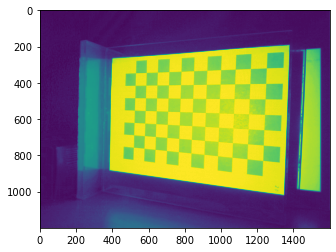

In [14]:
count = len(pattern_file_list)

image = cv2.imread(pattern_file_list[0], 0)

images = np.empty((count, image.shape[0], image.shape[1]))

for idx in range(count):
    images[idx] = cv2.imread(pattern_file_list[idx], 0)

direct_light = estimate_direct_light(images, 0.5)

plt.imshow(direct_light[0])

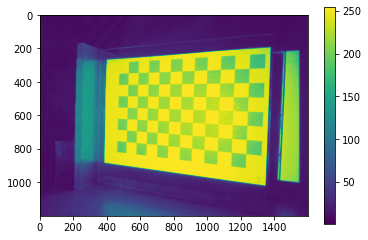

In [18]:
# plt.imshow(direct_light[1])
# plt.colorbar()
plt.imshow(direct_light[0])
plt.colorbar()

<IPython.core.display.Javascript object>


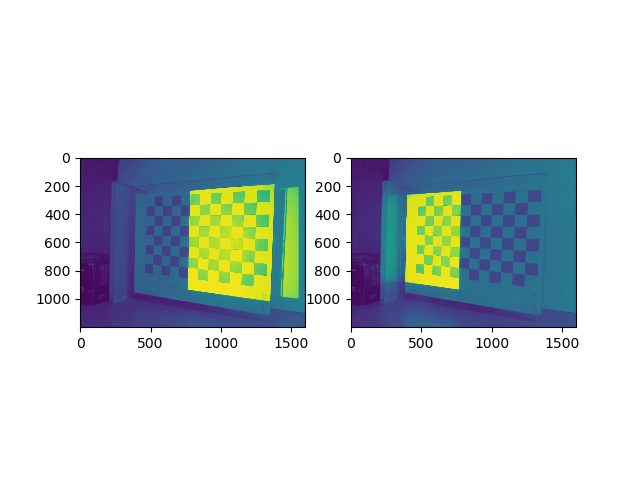

In [14]:
t = 2
bit = 9
set_idx = 1
channel = 0
init = True

gray_image1 = images[t+0]
gray_image2 = images[t+1]

plt.subplot(1,2,1)
plt.imshow(gray_image1)
plt.subplot(1,2,2)
plt.imshow(gray_image2)
plt.show()

if init:
    pattern_image = np.empty((gray_image1.shape[0], gray_image1.shape[1],2),dtype=np.float32)
    min_max_image = np.empty((gray_image1.shape[0], gray_image1.shape[1]), dtype=np.uint8)

if init:
    pattern_image[:,:,:] = 0.

pattern_image[:,:,channel][np.where(gray_image1>gray_image2)] += 1<<bit

In [15]:
np.where(gray_image1>gray_image2)

(array([   0,    0,    0, ..., 1199, 1199, 1199]),
 array([   7,    8,   13, ..., 1597, 1598, 1599]))

In [16]:
total_images = 44
total_patterns = int(total_images / 2 - 1)
total_bits = int(total_patterns / 2)

print("total_images:", total_images)
print("total_patterns:", total_patterns)
print("total_bits:", total_bits)

bit_count = (0, total_bits, total_bits)
set_size = (1, total_bits, total_bits)
COUNT = 2 * (set_size[0]+set_size[1]+set_size[2])

print("COUNT:", COUNT)

set_idx = 0
current = 0

init = True

pattern_image = np.empty((gray_image1.shape[0], gray_image1.shape[1],2),dtype=np.float32)
min_max_image = np.empty((gray_image1.shape[0], gray_image1.shape[1]), dtype=np.uint8)

for t in range(0,COUNT,2):
    if current==set_size[set_idx]:
        set_idx+=1
        current = 0
    if set_idx==0:
        current += 1
        continue
    bit = bit_count[set_idx] - current - 1
    channel = set_idx - 1
    
    print("t:", t)
    print("bit:", bit)
    print("set_idx", set_idx)
    print("channel", channel)
    
    gray_image1 = images[t+0]
    gray_image2 = images[t+1]
    
    if init:
        pattern_image[:,:,:] = 0.

    pattern_image[:,:,channel][np.where(gray_image1>gray_image2)] += (1<<bit)
    
    
    init = False
    current += 1

total_images: 44
total_patterns: 21
total_bits: 10
COUNT: 42
t: 2
bit: 9
set_idx 1
channel 0
t: 4
bit: 8
set_idx 1
channel 0
t: 6
bit: 7
set_idx 1
channel 0
t: 8
bit: 6
set_idx 1
channel 0
t: 10
bit: 5
set_idx 1
channel 0
t: 12
bit: 4
set_idx 1
channel 0
t: 14
bit: 3
set_idx 1
channel 0
t: 16
bit: 2
set_idx 1
channel 0
t: 18
bit: 1
set_idx 1
channel 0
t: 20
bit: 0
set_idx 1
channel 0
t: 22
bit: 9
set_idx 2
channel 1
t: 24
bit: 8
set_idx 2
channel 1
t: 26
bit: 7
set_idx 2
channel 1
t: 28
bit: 6
set_idx 2
channel 1
t: 30
bit: 5
set_idx 2
channel 1
t: 32
bit: 4
set_idx 2
channel 1
t: 34
bit: 3
set_idx 2
channel 1
t: 36
bit: 2
set_idx 2
channel 1
t: 38
bit: 1
set_idx 2
channel 1
t: 40
bit: 0
set_idx 2
channel 1


<IPython.core.display.Javascript object>


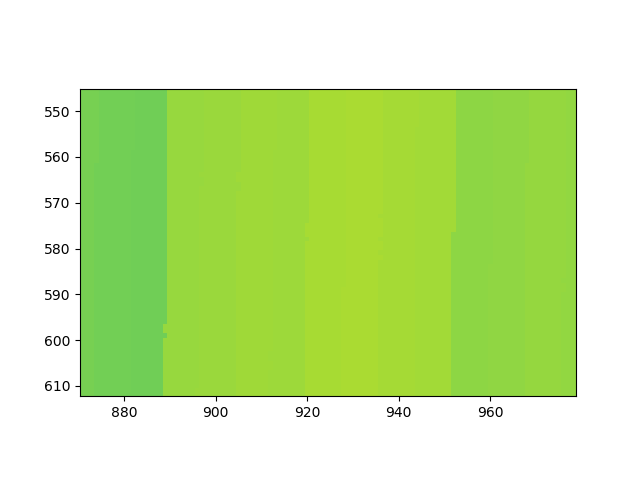

In [17]:
plt.imshow(pattern_image[:,:,0])

In [26]:
x = pattern_image[:,:,0].flatten()
y = pattern_image[:,:,1].flatten()

<IPython.core.display.Javascript object>


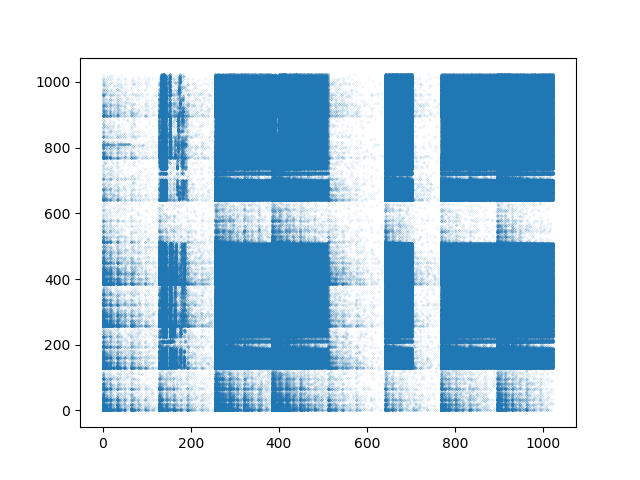

In [27]:
plt.scatter(x,y,marker='.',s=0.01)

In [29]:
def add(a):
    return a+2
def test_pro(input):
    def add_mul(p, func):
        return p + func(p)
    out = np.vectorize(add_mul)(input, add)
    return np.array(out) 

In [30]:
tmp = np.ones((3,3))

In [31]:
out = test_pro(tmp)

In [28]:
?np.vectorize